In [1]:
# pip install -U scikit-learn

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
import numpy as np
import pandas as pd
from time import time
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
x_test = np.load('/home/jovyan/X-IIoTID/x_test.npy')
x_train = np.load('/home/jovyan/X-IIoTID/x_train.npy')
x_val = np.load('/home/jovyan/X-IIoTID/x_val.npy')
y_test = np.load('/home/jovyan/X-IIoTID/y_test.npy')
y_train = np.load('/home/jovyan/X-IIoTID/y_train.npy')
y_val = np.load('/home/jovyan/X-IIoTID/y_val.npy')

In [6]:
# gnb_org = GaussianNB()
# gnb_org.fit(x_train, y_train)
# y_pred_org = gnb_org.predict(x_test)

# accuracy_gnb = accuracy_score(y_test, y_pred_org)
# micro_f1_gnb = f1_score_rep(y_test, y_pred_org, average="micro")
# macro_f1_gnb = f1_score_rep(y_test, y_pred_org, average="macro")

# print(f'Gaussian Naive Bayes Test Accuracy: {accuracy_gnb * 100:.2f}%')
# print(f'Gaussian Naive Bayes Micro F1 Score: {micro_f1_gnb}')
# print(f'Gaussian Naive Bayes Macro F1 Score: {macro_f1_gnb}')

In [7]:



# # 定义参数
# gnb_params = {
#     'var_smoothing': np.logspace(0, -9, num=100)
# }

# # 确保结果目录存在
# result_dir = Path('/content/drive/MyDrive/Data/results')
# if not result_dir.exists():
#     result_dir.mkdir()

# def tune_with_halving_grid_search_gnb(x_train, y_train, param_grid):
#     gnb = GaussianNB()

#     start = time()
#     halving_gnb_results = HalvingGridSearchCV(
#         gnb,
#         param_grid,
#         cv=5,
#         factor=2,
#         min_resources='exhaust',
#         scoring='accuracy'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = pd.DataFrame(halving_gnb_results.cv_results_)
#     results.to_csv(result_dir / 'halving_gnb_results.csv')

#     # 格式化和排序结果
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

# # 使用验证数据集进行参数调整
# halving_results, halving_duration = tune_with_halving_grid_search_gnb(x_val, y_val, gnb_params)

# print(halving_results.head())

# # 获取最佳参数和分数
# best_score = halving_results['mean_test_score'].iloc[0]
# best_params = halving_results['params'].iloc[0]

# # 使用最佳参数训练 GNB 模型
# best_gnb = GaussianNB(**best_params)
# best_gnb.fit(x_train, y_train)

# # 在测试集上评估
# accuracy = accuracy_score(y_test, best_gnb.predict(x_test))
# micro_f1 = f1_score_rep(y_test, best_gnb.predict(x_test), average="micro")
# macro_f1 = f1_score_rep(y_test, best_gnb.predict(x_test), average="macro")

# # 打印结果
# print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# print(f'Params: {best_params}')
# print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# print("Micro F1 Score: ", micro_f1)
# print("Macro F1 Score: ", macro_f1)


FPR: [6.29050997e-03 1.26593155e-02 1.26599481e-03 2.29785007e-01
 0.00000000e+00 2.13941879e-05 1.77423410e-03 1.99335047e-02
 7.75415414e-02 1.08888223e-01 2.87689066e-05 2.32238816e-03
 3.65375832e-03 1.99961436e-04 9.85758773e-04 1.41266174e-02
 9.06243087e-04 4.07211377e-02 2.03958247e-04]
TPR: [0.99691424 0.93157895 0.99761337 0.99648429 0.99412695 1.
 0.99901478 0.97470022 0.72891132 0.95454545 0.99664148 0.18210465
 0.99397161 0.75862069 0.49881385 0.98345154 1.         0.81222707
 0.99932134]
FNR: [3.08576293e-03 6.84210526e-02 2.38663484e-03 3.51571083e-03
 5.87305173e-03 0.00000000e+00 9.85221675e-04 2.52997760e-02
 2.71088681e-01 4.54545455e-02 3.35852225e-03 8.17895346e-01
 6.02839178e-03 2.41379310e-01 5.01186146e-01 1.65484634e-02
 0.00000000e+00 1.87772926e-01 6.78656261e-04]
TNR: [0.99370949 0.98734068 0.99873401 0.77021499 1.         0.99997861
 0.99822577 0.9800665  0.92245846 0.89111178 0.99997123 0.99767761
 0.99634624 0.99980004 0.99901424 0.98587338 0.99909376 0.

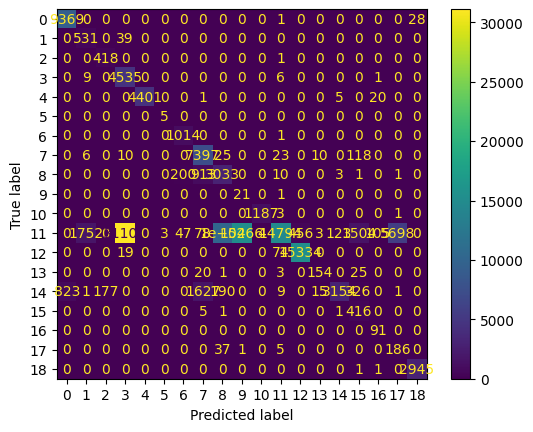

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_digits

best_gnb = GaussianNB(var_smoothing = 3.5111917342151273e-09)
best_gnb.fit(x_train, y_train)

y_pred = best_gnb.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, best_gnb.predict_proba(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=best_gnb.classes_)
disp.plot()
plt.show()

In [9]:
# mnb_org = MultinomialNB()
# mnb_org.fit(x_train, y_train)
# y_pred_mnb = mnb_org.predict(x_test)

# accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
# micro_f1_mnb = f1_score_rep(y_test, y_pred_mnb, average="micro")
# macro_f1_mnb = f1_score_rep(y_test, y_pred_mnb, average="macro")

# print(f'Multinomial Naive Bayes Test Accuracy: {accuracy_mnb * 100:.2f}%')
# print(f'Multinomial Naive Bayes Micro F1 Score: {micro_f1_mnb}')
# print(f'Multinomial Naive Bayes Macro F1 Score: {macro_f1_mnb}')

In [10]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
# import numpy as np
# import pandas as pd
# from time import time
# from pathlib import Path

# # 请确保已经加载了 x_train, y_train, x_test, y_test, x_val, y_val

# # 定义参数
# mnb_params = {
#     'alpha': np.linspace(0.0, 1.0, num=100)  # alpha 值从 0 到 1
# }

# # 确保结果目录存在
# result_dir = Path('/content/drive/MyDrive/Data/results')
# if not result_dir.exists():
#     result_dir.mkdir()

# def tune_with_halving_grid_search_mnb(x_train, y_train, param_grid):
#     mnb = MultinomialNB()

#     start = time()
#     halving_mnb_results = HalvingGridSearchCV(
#         mnb,
#         param_grid,
#         cv=5,
#         factor=2,
#         min_resources='exhaust',
#         scoring='accuracy'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = pd.DataFrame(halving_mnb_results.cv_results_)
#     results.to_csv(result_dir / 'halving_mnb_results.csv')

#     # 格式化和排序结果
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

# # 使用验证数据集进行参数调整
# halving_results, halving_duration = tune_with_halving_grid_search_mnb(x_val, y_val, mnb_params)

# print(halving_results.head())

# # 获取最佳参数和分数
# best_score = halving_results['mean_test_score'].iloc[0]
# best_params = halving_results['params'].iloc[0]

# # 使用最佳参数训练 MNB 模型
# best_mnb = MultinomialNB(**best_params)
# best_mnb.fit(x_train, y_train)

# # 在测试集上评估
# accuracy = accuracy_score(y_test, best_mnb.predict(x_test))
# micro_f1 = f1_score_rep(y_test, best_mnb.predict(x_test), average="micro")
# macro_f1 = f1_score_rep(y_test, best_mnb.predict(x_test), average="macro")

# # 打印结果
# print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# print(f'Params: {best_params}')
# print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# print("Micro F1 Score: ", micro_f1)
# print("Macro F1 Score: ", macro_f1)


FPR: [1.97810933e-02 5.59215237e-03 2.14575391e-05 1.98999108e-04
 1.78862028e-02 0.00000000e+00 0.00000000e+00 2.99002571e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.90857927e-01
 1.77880339e-03 0.00000000e+00 1.38155586e-03 0.00000000e+00
 1.42715447e-05 0.00000000e+00 3.99175426e-03]
TPR: [0.52436689 0.25087719 0.00477327 0.05427379 0.84300881 0.
 0.         0.95928317 0.         0.         0.00251889 0.96445057
 0.99118429 0.         0.03779851 0.         0.31868132 0.
 0.7044452 ]
FNR: [0.47563311 0.74912281 0.99522673 0.94572621 0.15699119 1.
 1.         0.04071683 1.         1.         0.99748111 0.03554943
 0.00881571 1.         0.96220149 1.         0.68131868 1.
 0.2955548 ]
TNR: [0.98021891 0.99440785 0.99997854 0.999801   0.9821138  1.
 1.         0.97009974 1.         1.         1.         0.70914207
 0.9982212  1.         0.99861844 1.         0.99998573 1.
 0.99600825]
Precision: 0.4453336762075381
Accuracy: 0.8009769664123226
F1-score: 0.29134332255580936
AUC: 0

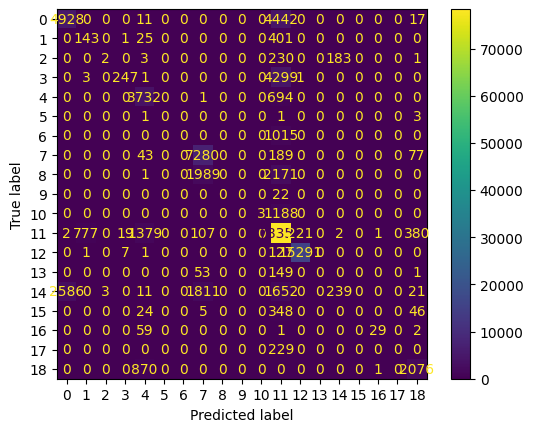

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_digits

best_mnb = MultinomialNB(alpha= 0.0)
best_mnb.fit(x_train, y_train)

y_pred = best_mnb.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, best_mnb.predict_proba(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=best_mnb.classes_)
disp.plot()
plt.show()

In [12]:
# cnb_org = ComplementNB()
# cnb_org.fit(x_train, y_train)
# y_pred_cnb = cnb_org.predict(x_test)

# accuracy_cnb = accuracy_score(y_test, y_pred_cnb)
# micro_f1_cnb = f1_score_rep(y_test, y_pred_cnb, average="micro")
# macro_f1_cnb = f1_score_rep(y_test, y_pred_cnb, average="macro")

# print(f'Complement Naive Bayes Test Accuracy: {accuracy_cnb * 100:.2f}%')
# print(f'Complement Naive Bayes Micro F1 Score: {micro_f1_cnb}')
# print(f'Complement Naive Bayes Macro F1 Score: {macro_f1_cnb}')

In [13]:
# from sklearn.naive_bayes import ComplementNB
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
# import numpy as np
# import pandas as pd
# from time import time
# from pathlib import Path

# # 请确保已经加载了 x_train, y_train, x_test, y_test, x_val, y_val

# # 定义参数
# cnb_params = {
#     'alpha': np.linspace(0.0, 1.0, num=100)  # alpha 值从 0 到 1
# }

# # 确保结果目录存在
# result_dir = Path('/content/drive/MyDrive/Data/results')
# if not result_dir.exists():
#     result_dir.mkdir()

# def tune_with_halving_grid_search_cnb(x_train, y_train, param_grid):
#     cnb = ComplementNB()

#     start = time()
#     halving_cnb_results = HalvingGridSearchCV(
#         cnb,
#         param_grid,
#         cv=5,
#         factor=2,
#         min_resources='exhaust',
#         scoring='accuracy'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = pd.DataFrame(halving_cnb_results.cv_results_)
#     results.to_csv(result_dir / 'halving_cnb_results.csv')

#     # 格式化和排序结果
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

# # 使用验证数据集进行参数调整
# halving_results, halving_duration = tune_with_halving_grid_search_cnb(x_val, y_val, cnb_params)

# print(halving_results.head())

# # 获取最佳参数和分数
# best_score = halving_results['mean_test_score'].iloc[0]
# best_params = halving_results['params'].iloc[0]

# # 使用最佳参数训练 CNB 模型
# best_cnb = ComplementNB(**best_params)
# best_cnb.fit(x_train, y_train)

# # 在测试集上评估
# accuracy = accuracy_score(y_test, best_cnb.predict(x_test))
# micro_f1 = f1_score_rep(y_test, best_cnb.predict(x_test), average="micro")
# macro_f1 = f1_score_rep(y_test, best_cnb.predict(x_test), average="macro")

# # 打印结果
# print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# print(f'Params: {best_params}')
# print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# print("Micro F1 Score: ", micro_f1)
# print("Macro F1 Score: ", macro_f1)

FPR: [0.04582212 0.         0.         0.         0.06616938 0.
 0.         0.03922618 0.         0.         0.         0.16678815
 0.02808426 0.         0.         0.         0.         0.
 0.        ]
TPR: [0.89753139 0.         0.         0.         0.84300881 0.
 0.         0.98049809 0.00216294 0.         0.         0.8832088
 0.99397161 0.         0.         0.         0.         0.
 0.        ]
FNR: [0.10246861 1.         1.         1.         0.15699119 1.
 1.         0.01950191 0.99783706 1.         1.         0.1167912
 0.00602839 1.         1.         1.         1.         1.
 1.        ]
TNR: [0.95417788 1.         1.         1.         0.93383062 1.
 1.         0.96077382 1.         1.         1.         0.83321185
 0.97191574 1.         1.         1.         1.         1.
 1.        ]
Precision: 0.21893936582001283
Accuracy: 0.7609070812237039
F1-score: 0.19260456186253674
AUC: 0.7764732306870292
FPR: 0.01821526829471166
tpr: 0.2421253495814816
fnr: 0.7578746504185184
tnr

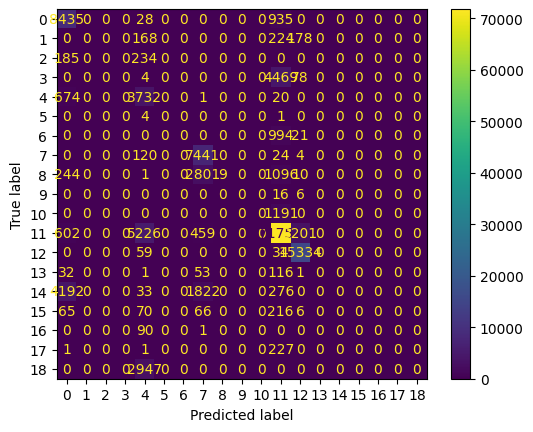

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_digits

best_cnb = ComplementNB(alpha= 0.010101010101010102)
best_cnb.fit(x_train, y_train)

y_pred = best_cnb.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, best_cnb.predict_proba(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=best_cnb.classes_)
disp.plot()
plt.show()

In [15]:
# bnb_org = BernoulliNB()
# bnb_org.fit(x_train, y_train)
# y_pred_bnb = bnb_org.predict(x_test)

# accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
# micro_f1_bnb = f1_score_rep(y_test, y_pred_bnb, average="micro")
# macro_f1_bnb = f1_score_rep(y_test, y_pred_bnb, average="macro")

# print(f'Bernoulli Naive Bayes Test Accuracy: {accuracy_bnb * 100:.2f}%')
# print(f'Bernoulli Naive Bayes Micro F1 Score: {micro_f1_bnb}')
# print(f'Bernoulli Naive Bayes Macro F1 Score: {macro_f1_bnb}')

In [16]:
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
# import numpy as np
# import pandas as pd
# from time import time
# from pathlib import Path

# # 请确保已经加载了 x_train, y_train, x_test, y_test, x_val, y_val

# # 定义参数
# bnb_params = {
#     'alpha': np.linspace(0.0, 1.0, num=100),  # alpha 值从 0 到 1
#     'binarize': np.linspace(0.0, 1.0, num=20)  # binarize 阈值
# }

# # 确保结果目录存在
# result_dir = Path('/content/drive/MyDrive/Data/results')
# if not result_dir.exists():
#     result_dir.mkdir()

# def tune_with_halving_grid_search_bnb(x_train, y_train, param_grid):
#     bnb = BernoulliNB()

#     start = time()
#     halving_bnb_results = HalvingGridSearchCV(
#         bnb,
#         param_grid,
#         cv=5,
#         factor=2,
#         min_resources='exhaust',
#         scoring='accuracy'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = pd.DataFrame(halving_bnb_results.cv_results_)
#     results.to_csv(result_dir / 'halving_bnb_results.csv')

#     # 格式化和排序结果
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

# # 使用验证数据集进行参数调整
# halving_results, halving_duration = tune_with_halving_grid_search_bnb(x_val, y_val, bnb_params)

# print(halving_results.head())

# # 获取最佳参数和分数
# best_score = halving_results['mean_test_score'].iloc[0]
# best_params = halving_results['params'].iloc[0]

# # 使用最佳参数训练 BNB 模型
# best_bnb = BernoulliNB(**best_params)
# best_bnb.fit(x_train, y_train)

# # 在测试集上评估
# accuracy = accuracy_score(y_test, best_bnb.predict(x_test))
# micro_f1 = f1_score_rep(y_test, best_bnb.predict(x_test), average="micro")
# macro_f1 = f1_score_rep(y_test, best_bnb.predict(x_test), average="macro")

# # 打印结果
# print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# print(f'Params: {best_params}')
# print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# print("Micro F1 Score: ", micro_f1)
# print("Macro F1 Score: ", macro_f1)


FPR: [8.68289104e-03 1.97336388e-02 1.16585962e-03 1.39491005e-01
 5.74361391e-04 5.70511678e-05 2.85888733e-02 1.33518294e-02
 9.75975424e-03 5.84845373e-04 3.26383245e-02 3.48358224e-02
 5.36846069e-04 1.28546637e-04 7.69190558e-04 1.00138047e-03
 2.52606341e-03 7.04994964e-03 9.98666987e-03]
TPR: [0.99276442 0.69649123 0.98090692 0.85321907 0.61779986 0.8
 0.96748768 0.96811174 0.76520067 0.         0.79764903 0.60771304
 0.99637    0.56650246 0.48442195 0.24586288 1.         0.37991266
 0.99932134]
FNR: [7.23558204e-03 3.03508772e-01 1.90930788e-02 1.46780927e-01
 3.82200136e-01 2.00000000e-01 3.25123153e-02 3.18882593e-02
 2.34799327e-01 1.00000000e+00 2.02350966e-01 3.92286956e-01
 3.62999935e-03 4.33497537e-01 5.15578048e-01 7.54137116e-01
 0.00000000e+00 6.20087336e-01 6.78656261e-04]
TNR: [0.99131711 0.98026636 0.99883414 0.860509   0.99942564 0.99994295
 0.97141113 0.98664817 0.99024025 0.99941515 0.96736168 0.96516418
 0.99946315 0.99987145 0.99923081 0.99899862 0.99747394 0

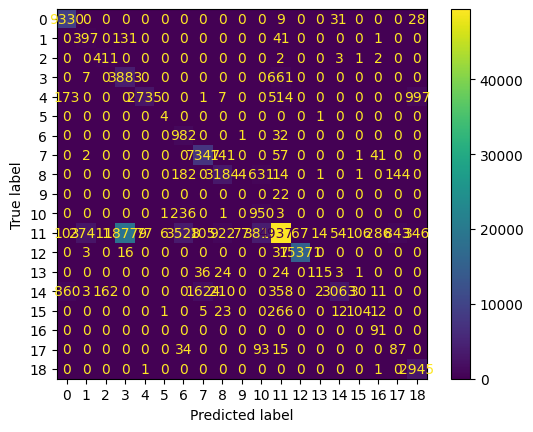

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_digits

best_bnb = BernoulliNB(alpha=0.686868686868687, binarize=0.42105263157894735)
best_bnb.fit(x_train, y_train)

y_pred = best_bnb.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, best_bnb.predict_proba(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=best_bnb.classes_)
disp.plot()
plt.show()

In [18]:
# ctnb_org = CategoricalNB()
# ctnb_org.fit(x_train, y_train)
# y_pred_ctnb = ctnb_org.predict(x_test)

# accuracy_ctnb = accuracy_score(y_test, y_pred_ctnb)
# micro_f1_ctnb = f1_score_rep(y_test, y_pred_ctnb, average="micro")
# macro_f1_ctnb = f1_score_rep(y_test, y_pred_ctnb, average="macro")

# print(f'Categorical Naive Bayes Test Accuracy: {accuracy_ctnb * 100:.2f}%')
# print(f'Categorical Naive Bayes Micro F1 Score: {micro_f1_ctnb}')
# print(f'Categorical Naive Bayes Macro F1 Score: {macro_f1_ctnb}')

In [19]:
# from sklearn.naive_bayes import CategoricalNB
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
# import numpy as np
# import pandas as pd
# from time import time
# from pathlib import Path

# # 请确保已经加载了 x_train, y_train, x_test, y_test, x_val, y_val

# # 定义参数
# ctnb_params = {
#     'alpha': np.linspace(0.0, 1.0, num=100)  # alpha 值从 0 到 1
# }

# # 确保结果目录存在
# result_dir = Path('/content/drive/MyDrive/Data/results')
# if not result_dir.exists():
#     result_dir.mkdir()

# def tune_with_halving_grid_search_ctnb(x_train, y_train, param_grid):
#     ctnb = CategoricalNB()

#     start = time()
#     halving_ctnb_results = HalvingGridSearchCV(
#         ctnb,
#         param_grid,
#         cv=5,
#         factor=2,
#         min_resources='exhaust',
#         scoring='accuracy'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = pd.DataFrame(halving_ctnb_results.cv_results_)
#     results.to_csv(result_dir / 'halving_ctnb_results.csv')

#     # 格式化和排序结果
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

# # 使用验证数据集进行参数调整
# halving_results, halving_duration = tune_with_halving_grid_search_ctnb(x_val, y_val, ctnb_params)

# print(halving_results.head())

# # 获取最佳参数和分数
# best_score = halving_results['mean_test_score'].iloc[0]
# best_params = halving_results['params'].iloc[0]

# # 使用最佳参数训练 CTNB 模型
# best_ctnb = CategoricalNB(**best_params)
# best_ctnb.fit(x_train, y_train)

# # 在测试集上评估
# accuracy = accuracy_score(y_test, best_ctnb.predict(x_test))
# micro_f1 = f1_score_rep(y_test, best_ctnb.predict(x_test), average="micro")
# macro_f1 = f1_score_rep(y_test, best_ctnb.predict(x_test), average="macro")

# # 打印结果
# print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# print(f'Params: {best_params}')
# print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# print("Micro F1 Score: ", micro_f1)
# print("Macro F1 Score: ", macro_f1)


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_digits

best_ctnb = CategoricalNB()
best_ctnb.fit(x_train, y_train)

y_pred = best_ctnb.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, best_ctnb.predict_proba(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=best_ctnb.classes_)
disp.plot()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [3]:
import numpy as np
x_test = np.load('/home/jovyan/X-IIoTID/x_test.npy')
x_train = np.load('/home/jovyan/X-IIoTID/x_train.npy')
x_val = np.load('/home/jovyan/X-IIoTID/x_val.npy')
y_test = np.load('/home/jovyan/X-IIoTID/y_test.npy')
y_train = np.load('/home/jovyan/X-IIoTID/y_train.npy')
y_val = np.load('/home/jovyan/X-IIoTID/y_val.npy')

from joblib import dump, load
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

best_gnb = GaussianNB(var_smoothing = 3.5111917342151273e-09)
best_gnb.fit(x_train, y_train)
dump(best_gnb, "/home/jovyan/X-IIoTID/pre_train/GNB.joblib")

best_mnb = MultinomialNB(alpha= 0.0)
best_mnb.fit(x_train, y_train)
dump(best_mnb, "/home/jovyan/X-IIoTID/pre_train/MNB.joblib")


best_cnb = ComplementNB(alpha= 0.010101010101010102)
best_cnb.fit(x_train, y_train)
dump(best_cnb, "/home/jovyan/X-IIoTID/pre_train/CNB.joblib")


best_bnb = BernoulliNB(alpha=0.686868686868687, binarize=0.42105263157894735)
best_bnb.fit(x_train, y_train)
dump(best_bnb, "/home/jovyan/X-IIoTID/pre_train/BNB.joblib")


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


['/home/jovyan/X-IIoTID/pre_train/MNB.joblib']